<a href="https://colab.research.google.com/github/manyajsingh/MachineLearning/blob/Personal_ML/matplotlib%26lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MATPLOTLIB**

In [ ]:
# pip install matplotlib- will install matplotlib if not running on colab

<Axes: >

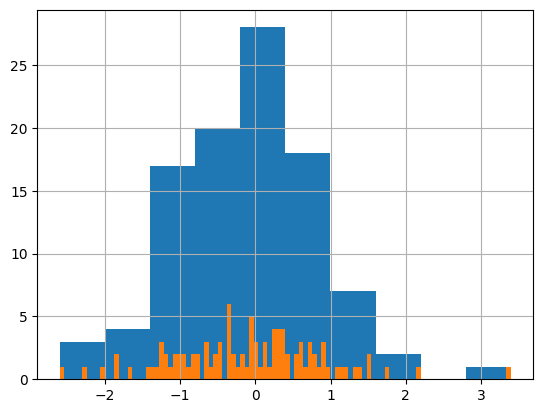

In [ ]:
import pandas as pd
import numpy as np
from numpy.random import randn
%matplotlib inline
mydf=pd.DataFrame(randn(100,4), columns=["monday", "tuesday", "wednesday", "thursday"])
mydf
# to create a histogram
mydf['wednesday'].hist()
# to create a histogram with smaller bins
mydf['wednesday'].hist(bins=100) # same command can be given using- mydf["wed"].plot(kind=hist, bins=100)
# for no grids use- mydf["monday"].hist(bins=20, grid= False)

<Axes: >

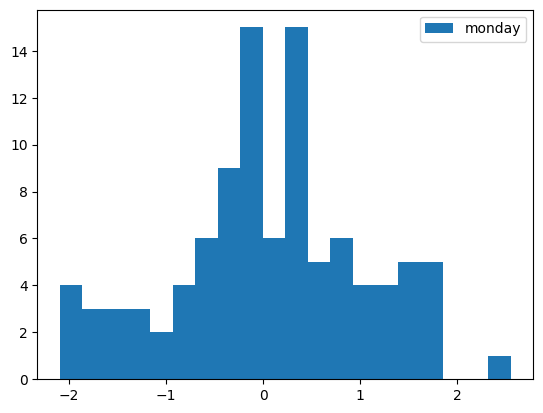

In [ ]:
mydf["monday"].hist(bins=20, grid= False, legend = True)

<Axes: >

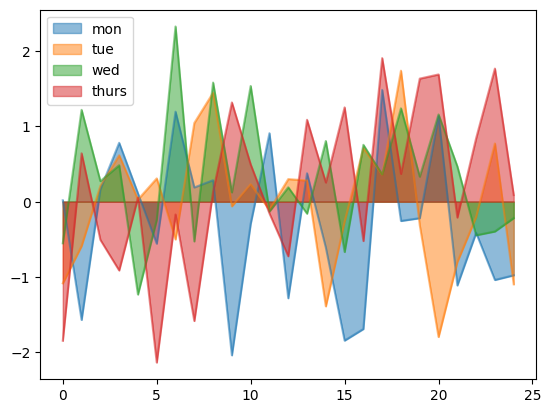

In [ ]:
mydf2=pd.DataFrame(randn(25,4), columns=['mon', 'tue', 'wed', 'thurs'])
# to create an area plot
mydf2.plot(kind='area', stacked= False) # not using stacked= Flase will give error

<Axes: >

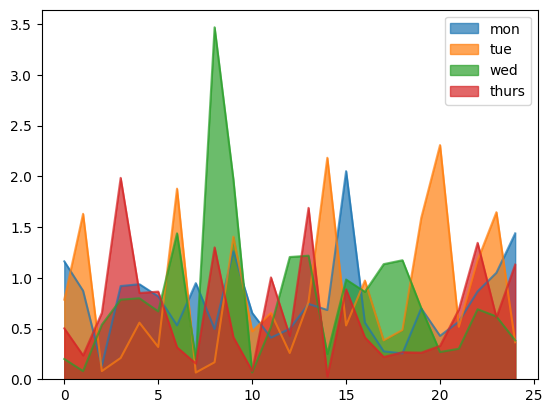

In [ ]:
mydf2.abs().plot(kind='area', stacked=False, alpha=0.7) # .abs() function returns only absolute value
# alpha commands can range from (0.1-1), determines the opaqueness of the colours

<Axes: title={'center': 'Hello World!'}>

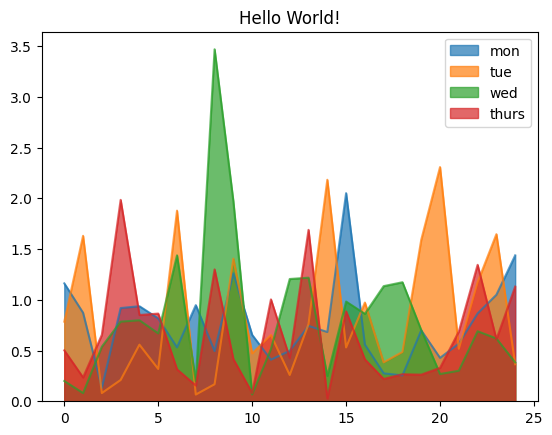

In [ ]:
mydf2.abs().plot(kind='area', stacked=False, alpha=0.7, title= "Hello World!")

<Axes: title={'center': 'Hello Monday & Thursday'}>

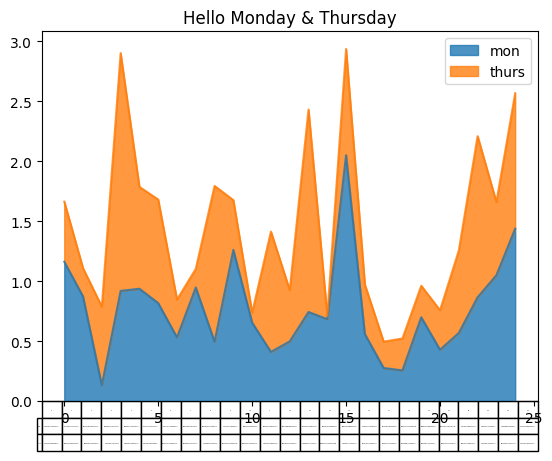

In [ ]:
mydf2[['mon','thurs']].abs().plot(kind='area', alpha=0.8, title= 'Hello Monday & Thursday', table=True)

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


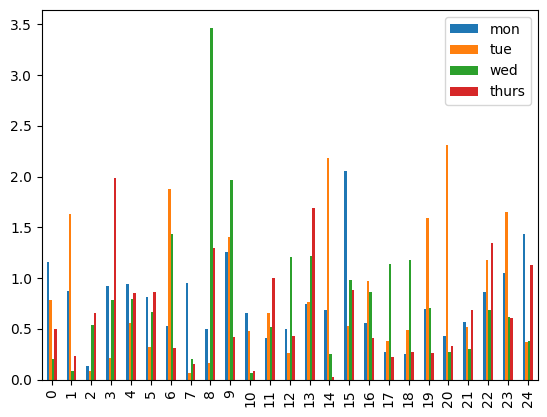

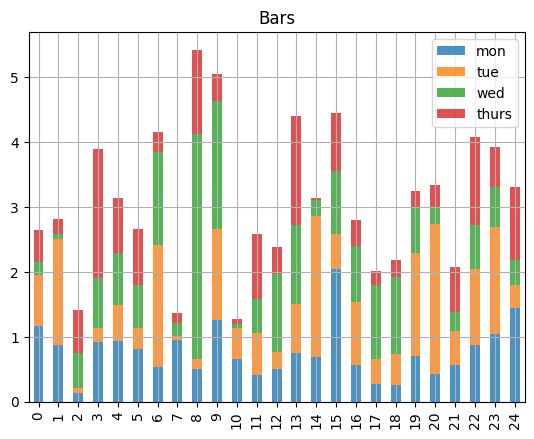

In [ ]:
# bar charts
print(mydf2.abs().plot(kind='bar'))
print(mydf2.abs().plot(kind='bar', stacked=True, grid=True, alpha=0.8, title="Bars"))

Axes(0.125,0.11;0.775x0.77)


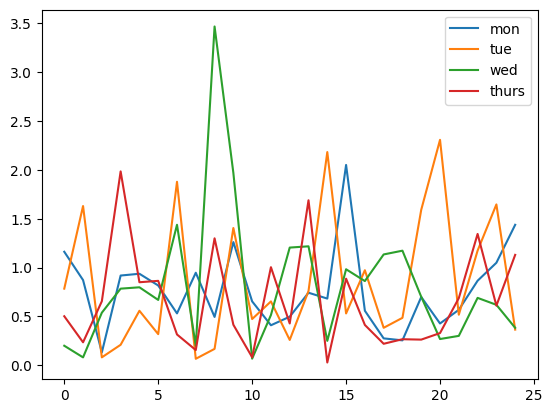

In [ ]:
# line charts
print(mydf2.abs().plot(kind='line', lw=1.5)) #lw- line width, opaqueness of line

Axes(0.125,0.11;0.775x0.77)


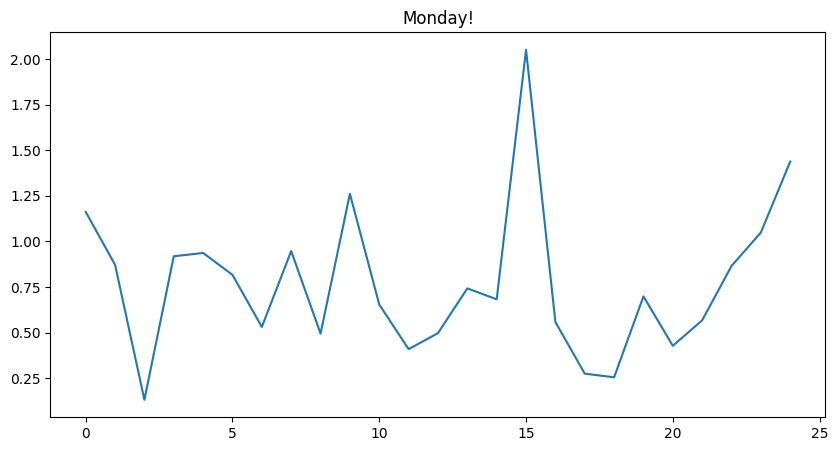

In [ ]:
print(mydf2['mon'].abs().plot(kind='line', title='Monday!', figsize=(10,5))) # figsize will give bigger or smaller dimensions of chart

Axes(0.125,0.11;0.62x0.77)
Axes(0.125,0.11;0.62x0.77)
Axes(0.125,0.11;0.62x0.77)
Axes(0.125,0.11;0.62x0.77)


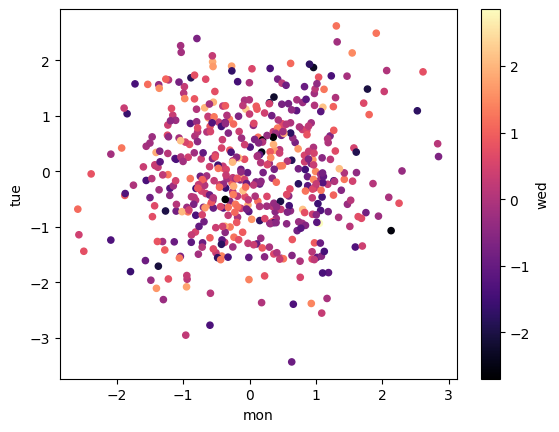

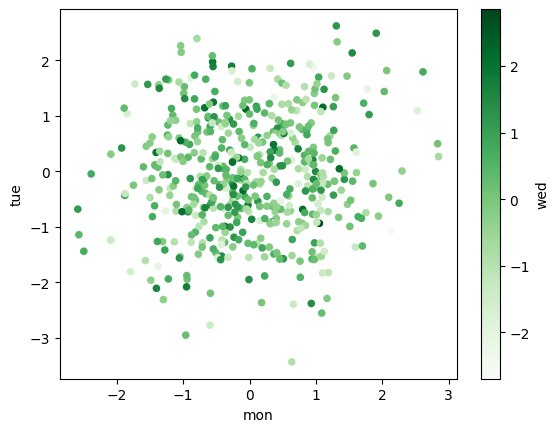

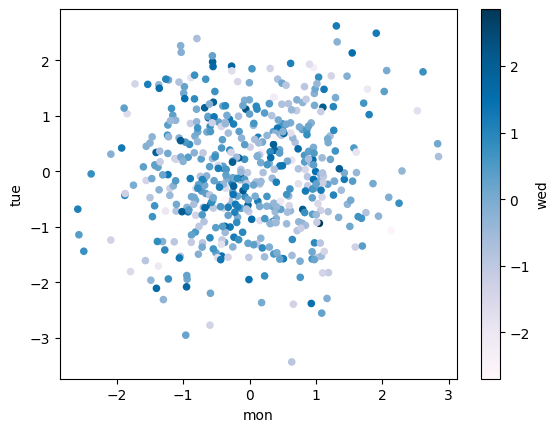

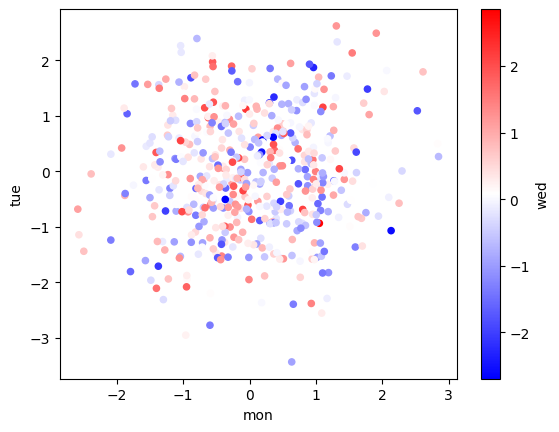

In [ ]:
mydf3=pd.DataFrame(randn(500,5), columns=['mon','tue','wed','thurs','fri'])
print(mydf3.plot(kind='scatter', x='mon', y='tue', c='wed', cmap='magma')) # simply giving the command mydf3.plot(kind='scatter) will give error
print(mydf3.plot(kind='scatter', x='mon', y='tue', c='wed', cmap='Greens'))
print(mydf3.plot(kind='scatter', x='mon', y='tue', c='wed', cmap='PuBu'))
print(mydf3.plot(kind='scatter', x='mon', y='tue', c='wed', cmap='bwr'))
# x,y,c, variables cannot be changed

Axes(0.125,0.11;0.775x0.77)


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


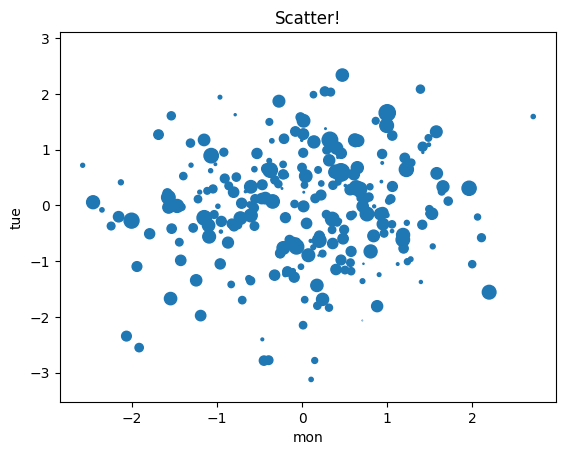

In [ ]:
print(mydf3.plot(kind='scatter', x='mon', y='tue', s=mydf3['wed']*50, title='Scatter!')) # note the s in place of c

<Axes: >

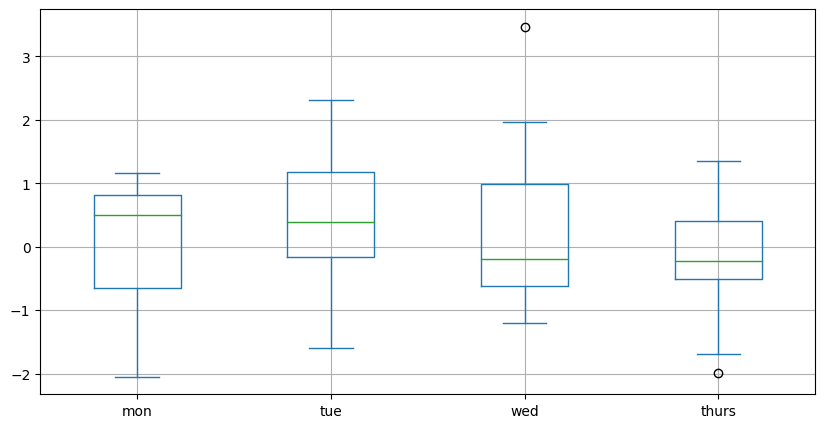

In [ ]:
mydf2.plot(kind='box', figsize=(10,5), legend=True, grid=True)

<Axes: xlabel='mon', ylabel='tue'>

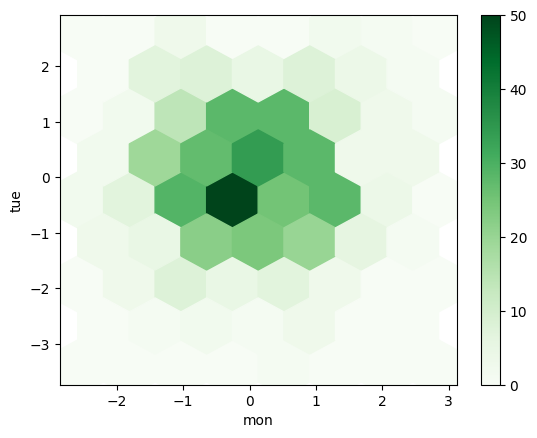

In [ ]:
mydf3.plot(kind='hexbin', x='mon', y='tue', gridsize=7, cmap='Greens')

<Axes: title={'center': 'wow!'}, xlabel='mon', ylabel='tue'>

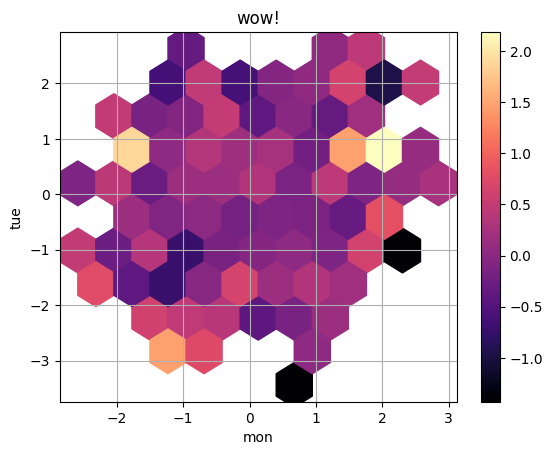

In [ ]:
mydf3.plot(kind='hexbin', x='mon', y='tue', C='thurs', gridsize=10, grid=True, cmap='magma', title='wow!')
# note the C instead of c

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


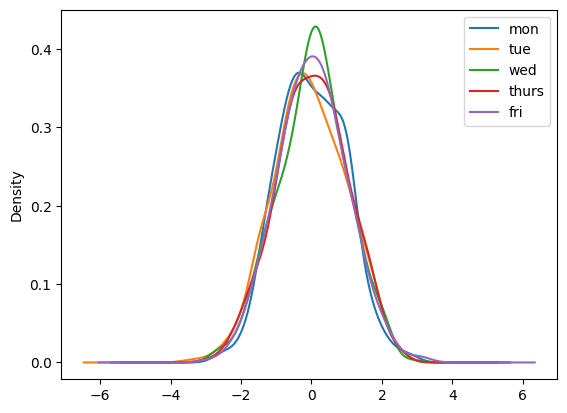

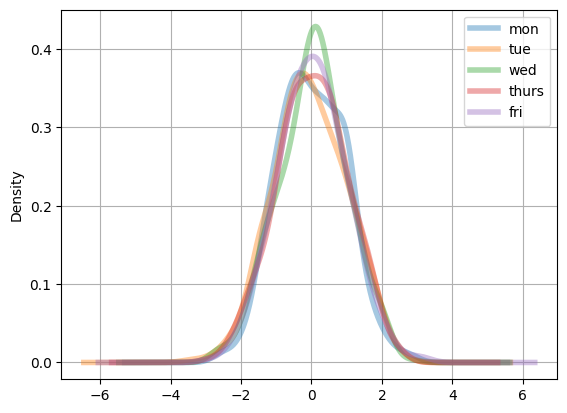

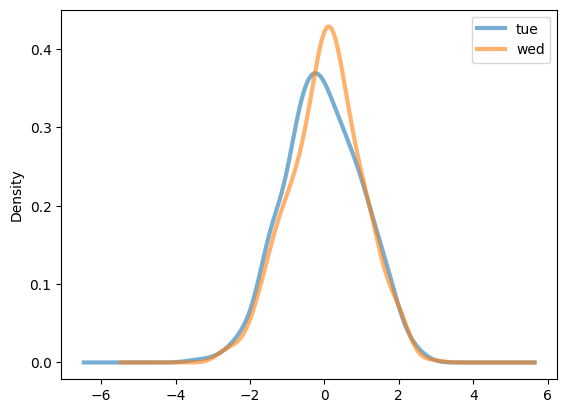

In [ ]:
import scipy # will work without this command too, in colab
# kernel density estimation plots
print(mydf3.plot(kind='kde')) # mydf3.plot.density()- same command
print(mydf3.plot(kind='kde', alpha=0.4, lw=4, grid=True))
print(mydf3[['tue','wed']].plot(kind='kde', alpha=0.6, lw=3))

**LINEAR REGRESSION**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
# to convert data to a pandas dataframe
mydf4=pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
mydf4

In [ ]:
for i in range(1,7):
  mydf4.drop("s"+str(i), axis=1, inplace=True)

In [ ]:
mydf4['target']=diabetes.target
mydf4.head() # first 5 indices

,age,sex,bmi,bp,target
0,0.038076,0.050680,0.061696,0.021872,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,75.0
2,0.085299,0.050680,0.044451,-0.005670,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,206.0
4,0.005383,-0.044642,-0.036385,0.021872,135.0


In [ ]:
x=mydf4.drop('target', axis=1)
y= mydf4['target']
x.shape, y.shape

((442, 4), (442,))

In [ ]:
from sklearn.model_selection import train_test_split
# split data into training and testing
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)
print("Training set shape: ", x_train.shape, y_train.shape)
print("Testing set shape: ", x_test.shape, y_test.shape)

Training set shape:  (353, 4) (353,)
Testing set shape:  (89, 4) (89,)


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train) # train the model on the training set- this is how the model works

LinearRegression()

In [ ]:
# predict on the training set based on the features
# once we have preds, we can compare them to the actual value of the targets
# to evaluate performance of model
y_pred= lr.predict(x_test)
y_pred.shape

(89,)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# evaluate performance of model
r2=r2_score(y_test, y_pred) # variance of target (dependent variable) explained by independent variables
                            # how well the model fits the data, the higher the better
mse=mean_squared_error(y_test, y_pred) # average squared distance between predicted and actual values, the lower the better
mae=mean_absolute_error(y_test, y_pred) # average absolute distnace between predicted and actual values, the lower the better
intercept= lr.intercept_ # starting point of regression line on y-axis
                         # value of targets when features are zero
                         # if positive, target is directly prop, to features, if negative- opp.
print(r2, mse, mae, intercept)

0.29811245023763977 3718.7067490354816 50.28638478318472 151.75708057848158


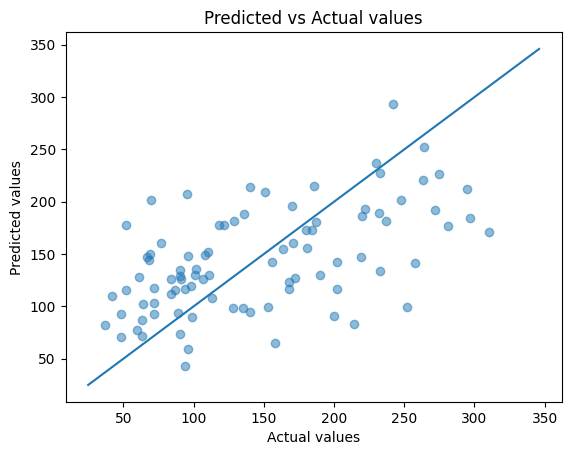

In [ ]:
import matplotlib.pyplot as plt
# plot predicted vs actual values
# predicted values of target- x axis
# actual values of target- y axis
# if model is good fit, points should be close to diagonal line
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual values')
plt.show()

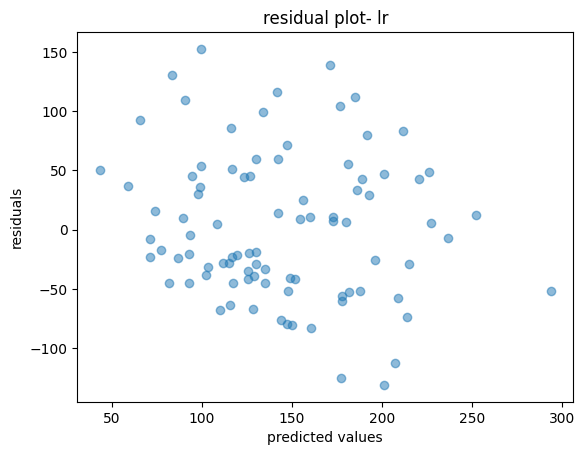

In [ ]:
# plot the residuals
# the residuals are plotted against the predicted values of the target variable
# if the model is a good fit for the data, the residual plot should show a random scatter
# with no discernable trend
plt.scatter(y_pred, y_test-y_pred, alpha=0.5)
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.title('residual plot- lr')
plt.show()